<a href="https://colab.research.google.com/github/u1117383/IS_4487_Spring_23/blob/main/Lab3_Lauren_Lengel_Module2_Script_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 2 Script

## Agenda

- Loading installed packages
- Inspect data
- Explore plot types 

Make sure you have downloaded tonight's script and data from Canvas.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib

We can pull sample data from 
- statsmodels.api

In [1]:
# pandas handles 2D data (ex. worksheets and excels)
import pandas as pd

#
import matplotlib as mpl
import sklearn as sl

## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [24]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

# reading comma-seperated data files and importing them into a dataframe (df)
df = pd.read_csv (r'/content/megatelco.csv')

print (df)

# the target variable is "leave" (will they renew/stay with their phone contract or leave?)

# predicting who will leave and who will stay?
  # hypothesis: wealthier people with more expensive houses will be more likely to stay

# many different variables:

  # measuring:
    # college = did they do college?
    # overage = did they go over their phone plan? by how much
    # handset price = cost of the phone
    # over_15mins_calls_per_months = more heavy phone usage

  # reported: 
    # reported_satisfaction = a survery 
    # reported_usage_level = a survey on their self-reported usage


Mounted at /content/gdrive
     college  income  overage  leftover   house  handset_price  \
0        one   23859       70         0  519105            154   
1       zero   72466       67        16  271182            262   
2       zero   30883       60         0  647281            211   
3        one   44512        0        22  754958            232   
4       zero   70535        0         0  653421            310   
...      ...     ...      ...       ...     ...            ...   
4995    zero   93699       26        56  385632            384   
4996    zero   25806       67        87  691020            142   
4997     one   97033      138        28  710559            311   
4998    zero   91558      229        15  853464            379   
4999     one  115943      200        42  173038            459   

      over_15mins_calls_per_month  average_call_duration  \
0                             5.0                      8   
1                             5.0                      5   


In [6]:
#look at the top rows
df.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [7]:
#look at last rows
df.tail(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
4990,one,158179,226,21,269368,478,18.0,5,avg,high,yes,LEAVE,18481
4991,one,75711,47,0,519512,326,4.0,12,high,high,yes,STAY,9790
4992,one,34039,59,0,541872,165,3.0,10,low,high,yes,STAY,19985
4993,zero,88713,0,70,587559,319,0.0,2,low,low,yes,LEAVE,17220
4994,zero,123820,0,71,608639,888,1.0,2,low,high,yes,STAY,10396
4995,zero,93699,26,56,385632,384,5.0,1,high,low,yes,LEAVE,19270
4996,zero,25806,67,87,691020,142,4.0,2,high,low,no,STAY,14549
4997,one,97033,138,28,710559,311,10.0,2,low,high,yes,STAY,9972
4998,zero,91558,229,15,853464,379,27.0,4,high,low,no,STAY,12685
4999,one,115943,200,42,173038,459,24.0,2,high,high,yes,LEAVE,13561


In [13]:
#get a summary of the dataset
df.describe()

# describe will only describe the numeric attributes 

# finding outliers:
  # minimum house price is negative (-$796,132)
  # minimum income is negative (-$28,811)
  # handset price maximum is absurdly high ($200,000,000)

# we need to clean up these outliers 

# options for outliers:
  # delete the row
  # delete that specific outlier/record/value
  # "impute" or make an educated guess of the value (ex. change the value to the average)

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


In [15]:
#look at the datatypes
df.info()

# looks at every variable and profiles them

# notice that over_15mins_calls_per_month has 3 null values (it's at 4997 vs 5000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

In [21]:
# taking out the outliers

# doing df and then [the column you want to reference... ex. house] 
# this will filter in... telling the data what to keep
  # ex. keep all houses over $0 & keep all incomes over $0 etc

df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


# Add Derived Attribute

Add a column with the income in K (thousands)

In [22]:
# putting income into thousands and making it a new column called ["income_k"]

df_clean['income_k'] = (df_clean['income']/1000).round(2)
df_clean.describe()

<ipython-input-22-479ab8adef6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income_k'] = (df_clean['income']/1000).round(2)


,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id,income_k
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619,79.918843
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195,41.673404
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000,20.030000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000,41.590000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000,75.030000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000,115.460000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000,159.940000


## Slice the data  
 What is average house price at the two levels of leave?

 Conclusion?  Stayers have substantially more expensive homes.

In [23]:
# taking two columns/variables of the df_clean dataset and taking the average

df_clean[['house','leave']].groupby('leave').mean().round(2) 

,house
leave,
LEAVE,439255.26
STAY,547591.97


In [26]:
# assignment:
  # create two charts
  # clean up two parts of the data

In [39]:
# Data clean up
  # cleaning up handset_price so that it's easier to read

df_clean['handset_simplified_price'] = (df_clean['handset_price']/100)
df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id,income_k,handset_simplified_price
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619,79.918843,3.875589
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195,41.673404,2.136143
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000,20.030000,1.300000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000,41.590000,2.190000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000,75.030000,3.220000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000,115.460000,5.280000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000,159.940000,8.990000


In [42]:
# Data clean up
  # cleaning up over_15mins_calls so that extraneous values aren't included

df_clean = df[(df['over_15mins_calls_per_month'] < 15) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000,3795.000000
mean,80212.906719,53.699341,24.193412,492028.675626,388.249012,3.261133,5.946772,10048.960474
std,41682.334420,67.361193,26.752276,253294.691869,213.246109,3.535132,4.368601,5850.286830
min,20045.000000,0.000000,0.000000,-796132.000000,130.000000,0.000000,1.000000,4.000000
25%,42069.000000,0.000000,0.000000,259890.500000,219.000000,1.000000,2.000000,4915.500000
50%,75512.000000,44.000000,15.000000,452635.000000,324.000000,3.000000,5.000000,10211.000000
75%,115437.000000,70.000000,42.000000,698738.500000,528.000000,5.000000,9.000000,15148.000000
max,159938.000000,284.000000,89.000000,1000000.000000,899.000000,14.000000,15.000000,20000.000000


In [44]:
# Data clean up
  # cleaning up average_call_duration so that extraneous values aren't included

df_clean = df[(df['average_call_duration'] < 45) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4995.000000,4998.000000,4998.000000
mean,79933.979192,85.104042,24.242697,493761.689676,387.567227,7.738539,5.957983,10035.801921
std,41682.984144,85.634060,26.847596,254278.677014,213.593685,8.802175,4.388871,5814.494101
min,20028.000000,0.000000,0.000000,-796132.000000,130.000000,0.000000,1.000000,2.000000
25%,41593.000000,0.000000,0.000000,260624.750000,219.000000,1.000000,2.000000,4949.500000
50%,75041.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10126.000000
75%,115497.000000,177.000000,42.000000,701612.250000,527.750000,14.000000,9.000000,15087.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


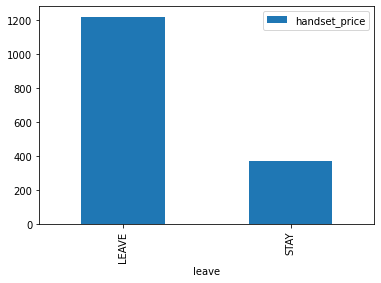

In [45]:
# Chart 1
df[['handset_price','leave']].groupby('leave').mean('handset_price').plot.bar()

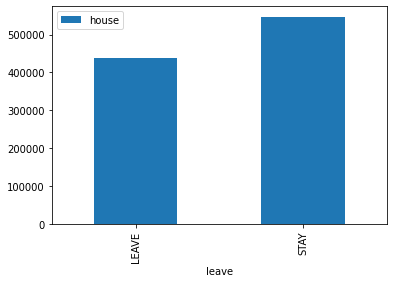

In [46]:
# Chart 2
df[['house','leave']].groupby('leave').mean('house').plot.bar()

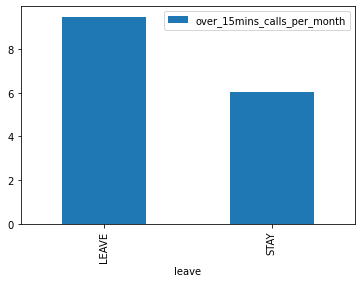

In [50]:
# Chart 3
df[['over_15mins_calls_per_month','leave']].groupby('leave').mean('over_15mins_calls_per_month').plot.bar()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


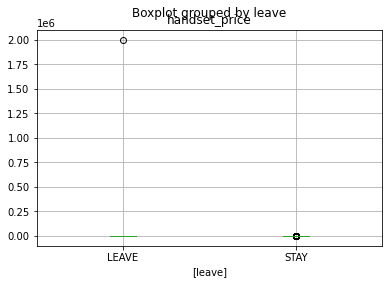

In [51]:
# Chart 4
df[['leave','handset_price']].boxplot(by='leave')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


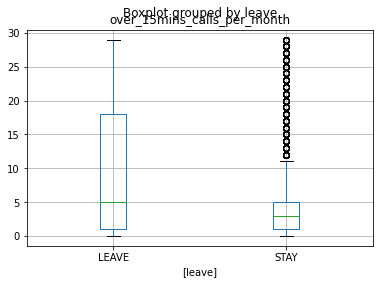

In [53]:
# Chart 5
df[['leave','over_15mins_calls_per_month']].boxplot(by='leave')